### Semana 4 - Evaluación del modelo y precisión

In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('data-week-3.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [87]:
df.columns = df.columns.str.lower().str.replace(' ','_') #cambiamos el nombre de columnas a uno estandarizado

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index) #retorna el nombre de las columnas categoricas

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_') #estandarizamos los datos de cada columna

In [88]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce') #ignora los datos faltas en el caso de totalcharges

In [89]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce') #convertimos los valores en el dataframe
df.totalcharges = df.totalcharges.fillna(0) #replazamos los na 

In [90]:
df.churn = (df.churn == 'yes').astype(int) #si es True, convierte en 1, de lo contrario, en 0

In [91]:
from sklearn.model_selection import train_test_split #divide el data frame de manera aleatoria

In [92]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) #se pasa el porcentaje y semilla de random
len(df_full_train), len(df_test) #tamaños de los dataframes

(5634, 1409)

In [93]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_test),len(df_train),len(df_val)

(1409, 4225, 1409)

In [94]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [95]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [96]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [97]:
numerical = ['tenure','monthlycharges','totalcharges']
categorical = [col for col in df_full_train.columns if col not in numerical + ['customerid', 'churn']]
categorical, numerical

(['gender',
  'seniorcitizen',
  'partner',
  'dependents',
  'phoneservice',
  'multiplelines',
  'internetservice',
  'onlinesecurity',
  'onlinebackup',
  'deviceprotection',
  'techsupport',
  'streamingtv',
  'streamingmovies',
  'contract',
  'paperlessbilling',
  'paymentmethod'],
 ['tenure', 'monthlycharges', 'totalcharges'])

In [98]:
from sklearn.feature_extraction import DictVectorizer

In [99]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records') #orient lo ordena mejor
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [100]:
dv = DictVectorizer(sparse=False)

In [101]:
dv.fit(train_dicts) #se le enseña la forma en la que se van a entregar los datos
X_train = dv.transform(train_dicts)
X_train.shape

(4225, 45)

In [102]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records') 
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression()
y_train.shape

(4225,)

In [105]:
model.fit(X_train, y_train) #ajustamos el módelo para hallar los pesos

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_pred = model.predict_proba(X_train)[:, 1] #predict retorna los valores 0 o 1, predict_proba retorna dos probabilidades, la primera de que sea 0
#la otra de que sea 1, con [:, 1] mostramos solo la probabilidad de que sea 1

In [107]:
y_pred_val = model.predict_proba(X_val)[:, 1]
y_pred_val.shape

(1409,)

In [108]:
churn_decision = (y_pred_val >= 0.5) #lista binaria clientes que es probable que churneen
churn_decision.shape

(1409,)

In [109]:
(y_val == churn_decision).mean() #porcentaje que concuerdan

np.float64(0.801277501774308)

## 4.2 Precisión

In [110]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_val, churn_decision) #para probar la precisión del modelo usamos esta función recibe los valores reales y los predichos

0.801277501774308

In [113]:
scores = []

for t in thresholds:
    churn_decision = (y_pred_val >= t)
    score = (y_val == churn_decision).mean()
    print('Probability:', t.round(2), 'Score:', score.round(3))
    scores.append(score)

scores

Probability: 0.0 Score: 0.274
Probability: 0.05 Score: 0.509
Probability: 0.1 Score: 0.598
Probability: 0.15 Score: 0.664
Probability: 0.2 Score: 0.707
Probability: 0.25 Score: 0.737
Probability: 0.3 Score: 0.759
Probability: 0.35 Score: 0.766
Probability: 0.4 Score: 0.78
Probability: 0.45 Score: 0.793
Probability: 0.5 Score: 0.801
Probability: 0.55 Score: 0.798
Probability: 0.6 Score: 0.797
Probability: 0.65 Score: 0.784
Probability: 0.7 Score: 0.765
Probability: 0.75 Score: 0.744
Probability: 0.8 Score: 0.73
Probability: 0.85 Score: 0.726
Probability: 0.9 Score: 0.726
Probability: 0.95 Score: 0.726
Probability: 1.0 Score: 0.726


[np.float64(0.2739531582682754),
 np.float64(0.5088715400993612),
 np.float64(0.5982966643009227),
 np.float64(0.6635911994322214),
 np.float64(0.7068843151171044),
 np.float64(0.7374024130589071),
 np.float64(0.759403832505323),
 np.float64(0.765791341376863),
 np.float64(0.7799858055358411),
 np.float64(0.7934705464868701),
 np.float64(0.801277501774308),
 np.float64(0.7984386089425124),
 np.float64(0.7970191625266146),
 np.float64(0.7842441447835344),
 np.float64(0.7650816181689141),
 np.float64(0.7437899219304471),
 np.float64(0.7295954577714692),
 np.float64(0.7260468417317246),
 np.float64(0.7260468417317246),
 np.float64(0.7260468417317246),
 np.float64(0.7260468417317246)]

### Class Imabalance y su importancia en modelos

Class imbalance in machine learning occurs when the number of instances in one class (En este caso no churning) significantly outweighs the number of instances in other classes (En este caso churning) within a dataset. This can lead to biased models that perform poorly on the minority class, which is often the class of interest

## 4.3 Confusion Table

Forma de validar la precisión de un modelo que presenta Class Imbalance | Falsos negativos y Falsos positivos

In [114]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [115]:
t = 0.5
predict_positive = (y_pred_val >= t)
predict_negative = (y_pred_val < t)

In [116]:
tp = (predict_positive & actual_positive).sum() #revisamos los true positives | si ambos son true, retorna true
tn = (predict_negative & actual_negative).sum() #revisamos los true negatives | si ambos son false, retorna true
tp, tn

(np.int64(214), np.int64(915))

In [117]:
fp = (predict_positive & actual_negative).sum() #falsos positivos, predijimos que era positivo y no era
fn = (predict_negative & actual_positive).sum() #falsos negativos, predijimos que era negativo y no era

In [118]:
fp, fn

(np.int64(108), np.int64(172))

In [119]:
confusion_matrix = np.array([[tn, fp],[fn, tp]])
confusion_matrix

array([[915, 108],
       [172, 214]])

In [120]:
(confusion_matrix / confusion_matrix.sum()).round(2) #porcentaje de los valores reales y falsos

array([[0.65, 0.08],
       [0.12, 0.15]])

## 4.4 Precision and Recall

In [121]:
p = tp / (tp + fp) #porcentaje de positivos entre los predichos | conocido como precisión
p

np.float64(0.6645962732919255)

In [122]:
r = tp / (tp + fn) #proporción de verdaderos positivos entre el total de instancias positivas (falsos negativos = positivos no identificados)
# conocido como recall
r #el complemento de r son el numero que fallaron a identificarse

np.float64(0.5544041450777202)

## 4.5 ROC

### TPR and FPR

In [123]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5544041450777202)

In [124]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10557184750733138)

In [125]:
thresholds = np.linspace(0,1,101)

In [126]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred_val >= t)
    predict_negative = (y_pred_val < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    scores.append((t, tp, fp, fn, tn))

In [127]:
columns = ['threshold','tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

In [128]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [129]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,903,1,120,0.997409,0.882698
2,0.02,384,812,2,211,0.994819,0.793744
3,0.03,382,753,4,270,0.989637,0.736070
4,0.04,380,708,6,315,0.984456,0.692082
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


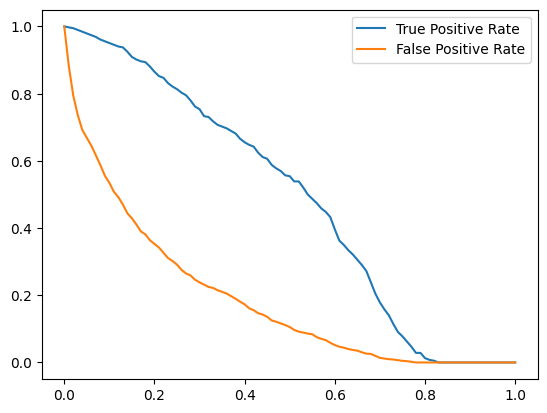

In [130]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='True Positive Rate')
plt.plot(df_scores.threshold, df_scores['fpr'], label='False Positive Rate')
plt.legend()

### Random Model

In [131]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089], shape=(1409,))

In [132]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [133]:
def tpr_fpr_dataframe(y_val, y_pred_val):
    scores=[]

    thresholds = np.linspace(0,1,101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred_val >= t)
        predict_negative = (y_pred_val < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold','tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [134]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


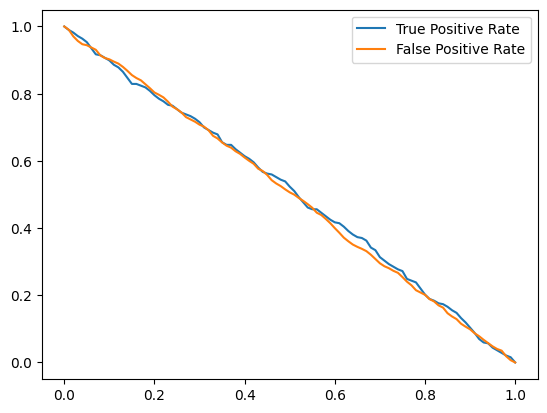

In [135]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='True Positive Rate')
plt.plot(df_rand.threshold, df_rand['fpr'], label='False Positive Rate')
plt.legend()

### Ideal Model

Organizar las personas porprobabilidad de churn y que a partir de cierto threshold sean true positive

In [136]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [137]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos]) #array con los valores de 0 y 1 las mismas veces que y_val
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [138]:
y_ideal_pred = np.linspace(0,1,len(y_val))

In [139]:
1 - y_val.mean() #treshhold 

np.float64(0.7260468417317246)

In [140]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [141]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


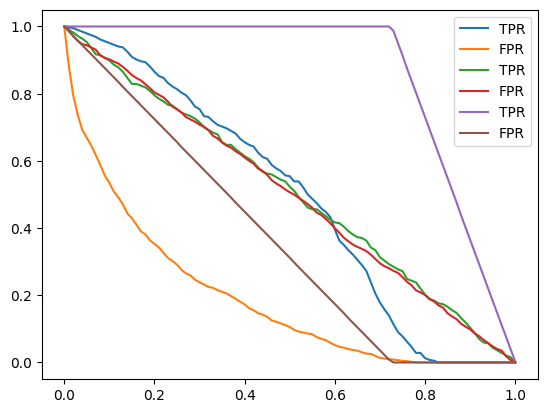

In [142]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')

plt.legend()

/tmp/ipykernel_6052/2916057642.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


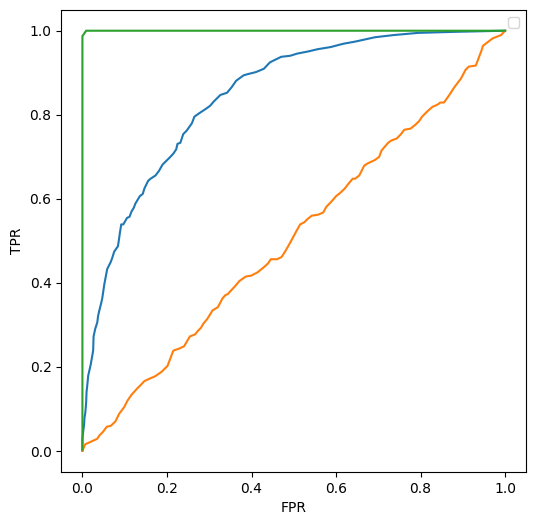

In [143]:
plt.figure(figsize=(6, 6))

plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot(df_rand.fpr, df_rand.tpr)
plt.plot(df_ideal.fpr, df_ideal.tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')


plt.legend()

## ROC con Scikit-learn

In [144]:
from sklearn.metrics import roc_curve

In [145]:
fpr, tpr, thr = roc_curve(y_val, y_pred_val) #funcion de scikitleanr que retorna el fpr y tpr

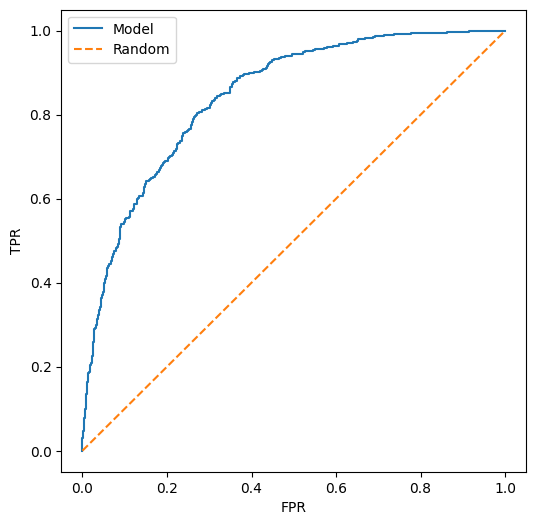

In [146]:
plt.figure(figsize=(6, 6))

plt.plot(fpr, tpr, label = 'Model')
plt.plot([0,1], [0,1], label = 'Random', linestyle = '--')


plt.xlabel('FPR')
plt.ylabel('TPR')


plt.legend()

## 4.6 AUC - Area Under the Curve

Área bajo la curva, entre más aproximado este a 1 mejor | 0.5 implica que es random

In [147]:
from sklearn.metrics import auc

In [148]:
auc(df_scores.fpr, df_scores.tpr) #eje x, eje y

np.float64(0.8443696534119398)

In [149]:
auc(fpr, tpr) #eje x, eje y

np.float64(0.8445038720820102)

In [150]:
from sklearn.metrics import roc_auc_score

In [151]:
roc_auc_score(y_val, y_pred_val)

np.float64(0.8445038720820102)

In [152]:
neg = y_pred_val[y_val == 0] #personas que no churnean
pos = y_pred_val[y_val == 1] #personas que churnean


In [153]:
import random 

n = 10000

success = 0

for i in range(n):
    neg_inx = random.randint(0, len(neg)-1)
    pos_inx = random.randint(0, len(pos)-1)

    if pos[pos_inx] > neg[neg_inx]:
        success+=1 


#se retorna un valor cercano a AUC        
success / n

0.8441

In [154]:
n=10000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [155]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.8372)

## 4.7 Cross-Validation

- Evaluar el modelo en diferentes subsets
- Obtener la predicción media y la dispersión

In [156]:
def train(df_train, y_train, C = 1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter = 10000)
    model.fit(X_train, y_train)

    return dv, model

In [157]:
dv, model = train(df_train, y_train, C = 0.00010)

In [158]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [159]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.03807743, 0.24553116, 0.24466683, ..., 0.27936154, 0.75199467,
       0.74491185], shape=(1409,))

In [160]:
from sklearn.model_selection import KFold

In [161]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1) #para dividir el dataset 

In [162]:
!pip install tqdm

In [163]:
from tqdm.auto import tqdm

In [164]:
n_splits = 5

for C in [0.0001, 0.01, 0.1, 0.5, 1, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []

    for train_idx, val_idx in tqdm(kfold.split(df_full_train), total = n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(C, np.mean(scores), np.std(scores))

  0%|          | 0/5 [00:00<?, ?it/s]

0.0001 0.8105262961888036 0.009166223110867528


  0%|          | 0/5 [00:00<?, ?it/s]

0.01 0.8399527427063243 0.008235658006889298


  0%|          | 0/5 [00:00<?, ?it/s]

0.1 0.841870829966315 0.0072342930187319285


  0%|          | 0/5 [00:00<?, ?it/s]

0.5 0.8419397414804113 0.006870623407195754


  0%|          | 0/5 [00:00<?, ?it/s]

1 0.8418460182682992 0.0069071206359891


  0%|          | 0/5 [00:00<?, ?it/s]

10 0.8417855457979412 0.0067108721219644495


In [165]:
dv, model = train(df_full_train, df_full_train.churn, C=1.0)
y_pred = predict(df_test, dv, model)
        
auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.8584032088573997)

In [166]:
np.mean(scores), np.std(scores)

(np.float64(0.8417855457979412), np.float64(0.0067108721219644495))